# Lab 4: Using data to answer concrete questions
#### COSC 410: Spring 2024, Colgate University

The goal of this notebook is to strengthen your ability to find answers to concrete questions from a given dataset. This is an important skill as you start thinking about your final projects. 

Here are some learning objectives for this lab:

1. Given a broad question and dataset, operationalize the question in terms of the data you have available. 
2. Fit a linear regression model and interpret the learned parameters. 
3. Compute the goodness of a linear regression model and use this to reason about the usefulness of features. 
4. Given a question and a learned model, come up with an answer to the question (or justify why it is not possible to come up with a clear answer)
5. Given some code, explain what is the task the code is trying solve, why, and how it solves it. 


There are 3 parts to this lab. The table below highlights what you are expected to do in each part. 

| Part | Description                                       | Write code? | Write responses? | 
|------|---------------------------------------------------| ------------|------------------|
| 1    | Introducing the question and dataset              | No          | No               |
| 2    | Operationalizing the question and fitting a model | Yes         | Yes              |
| 3    | More data exploration                             | No          | Yes              |


## Part 1: Introducing the question and the dataset

**Question:** Are women given worse car rates than men? 

**Dataset:** We will use the [Car Sales Report](https://www.kaggle.com/datasets/missionjee/car-sales-report) dataset from Kaggle.



In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


df = pd.read_csv('car_sales_data.csv')
print(df.columns)

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


In [23]:
n = df.shape[0]

train = df.iloc[0:int(n*0.7)]
val = df.iloc[int(n*0.7):int(n*0.8)]
test = df.iloc[int(n*0.8):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

Train has 16734 rows
Val has 2390 rows
Test has 4782 rows


In [24]:
for col in df.columns:
    if col not in ['Car_id', 'Date', 'Price ($)']:
        print(col)
        print(df[col].unique())
        print()

Customer Name
['Geraldine' 'Gia' 'Gianna' ... 'Pol' 'Teho' 'Djamel Epoine']

Gender
[0 1]

Annual Income
[  13500 1480000 1035000 ...  374060 4111000 1369000]

Dealer_Name
["Buddy Storbeck's Diesel Service Inc" 'C & M Motors Inc' 'Capitol KIA'
 'Chrysler of Tri-Cities' 'Chrysler Plymouth' 'Classic Chevy'
 'Clay Johnson Auto Sales' 'U-Haul CO' 'Rabun Used Car Sales'
 'Race Car Help' 'Saab-Belle Dodge' 'Scrivener Performance Engineering'
 'Diehl Motor CO Inc' 'Star Enterprises Inc' 'Suburban Ford'
 'Tri-State Mack Inc' 'Progressive Shippers Cooperative Association No'
 'Ryder Truck Rental and Leasing' 'Enterprise Rent A Car'
 'Gartner Buick Hyundai Saab' 'Hatfield Volkswagen' 'Iceberg Rentals'
 'McKinney Dodge Chrysler Jeep' 'Motor Vehicle Branch Office'
 'Nebo Chevrolet' 'New Castle Ford Lincoln Mercury' 'Pars Auto Sales'
 'Pitre Buick-Pontiac-Gmc of Scottsdale']

Company
['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Chevrolet'
 'Nissan' 'Mercury' 'BMW' 'Chrysler' 'Subaru' '

## Part 2: Operationalizing the question and fitting a model

### Writing out the model equation
How could you answer this question using linear regression with one feature? Write out the equation for the model and explain how the input features could be represented? (e.g., can you plug in values from columns directly? If not, how might you want to transform them?)

#### Write answer here


Price = B0 + B1*Gender

The intercept value here, represents the predicted price of a car when all input features are zero. 
In this case, the input feature is gender, which is encoded as 0 for Male and 1 for Female. 
The intercept can be interpreted as the average price of a car for Male. This means that if a car
buyer is male (gender encoded as 0), the starting point for predicting the price of the car they 
are interested in would be approximately $28096.13811360714, before considering the impact of gender 
on the final price.

### Train a regression model

Now train the linear regression model. If you want to transform any columns, it might be helpful to write a function that applies this transformation to a dataframe, so that you can transform your trian, validtation and test sets easily. 

In [64]:
## Write code here
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('car_sales_data.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


X_train = train[['Gender']]  
y_train = train['Price ($)']  
model = LinearRegression()
model.fit(X_train, y_train)
X_val = val[['Gender']] 
y_val = val['Price ($)'] 
# X_test = test[['Gender']] 
# y_test = test['Price ($)'] 
y_pred = model.predict(X_val)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Gender: {model.coef_[0]}")


Intercept: 28096.13811360714
Coefficient for Gender: -10.181666126354397


<Axes: xlabel='Gender', ylabel='Price ($)'>

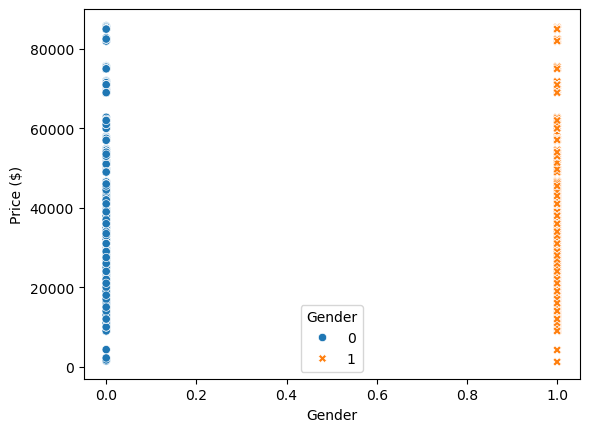

In [52]:
sns.scatterplot(data=df, x="Gender", y="Price ($)", hue="Gender", style="Gender")

<Axes: xlabel='Gender', ylabel='Price ($)'>

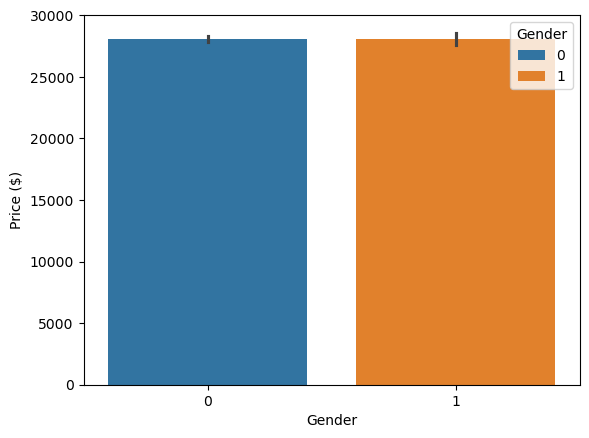

In [53]:
sns.barplot(x='Gender', y='Price ($)', hue='Gender', data=train, estimator=np.mean)

### Evaluate your model

Evaluate your model and print out one number that summarizes the model's performance. Does this number help you answer our question? Why or why not? 

*Hint: Think about what the loss a regression model is trying to minimize, and how that relates to your evaluation of the model's performance*


In [57]:
## Write code here

from sklearn.metrics import mean_squared_error
mean_square = mean_squared_error(y_val, y_pred)
print(f"MSE: {mean_square}")

MSE: 221918967.39908525


#### Write answer here
The MSE of 221918967.39908525 is quite large, suggesting that the model predictions may not be very accurate.

Not helpful because we don't know what this means (we don't have a baseline to compare to)

### Using the parameters of the trained model to answer your question

Your model has learned some parameters. How can you use these parameters to answer our question? 

*Hint: It might help to go back to the equation and think carefully about how the output changes are the input features change*

In [73]:

predicted_price_male = model.intercept_ + model.coef_[0] * 0
print(f"Predicted Price for Male: {predicted_price_male}")


predicted_price_female = model.intercept_ + model.coef_[0] * 1
print(f"Predicted Price for Female: {predicted_price_female}")


Predicted Price for Male: 28096.13811360714
Predicted Price for Female: 28085.956447480785


#### Write answer here
Based on the model parameters, I have calculated the predicted prices for males and females. The predicted price for males is 28096.13811360714, and for females is 28085.956447480785. Using the intercept and coefficient values in the equation, the output changes as the input feature,i.e. the gender, changes. In this scenario, a negative coefficient for gender indicates that as the gender value changes from male --> 0 to female -->1, the price also tends to increase.

### Evaluating the answer

Are you convinced by the answer you got from the model? What are some things you might want to be wary of?

The negative coefficient for gender (-10.18) suggests that women pay less than men for a car, while the y-intercept represents the average amount a man pays. This raises concerns about the accuracy of the model's predictions and leads me to believe that the predictions are not accurate.

## Part 3: More data exploration

So far in class we have been thinking about features indepdently of each other. Sometimes it can be helpful to think about how different features **interact** with each other. 

### Plotting interaction with gender and other features

<Axes: xlabel='Transmission', ylabel='Price ($)'>

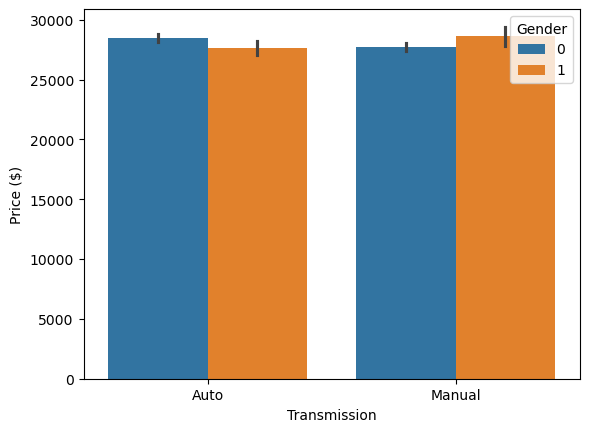

In [58]:
sns.barplot(x='Transmission', y='Price ($)', hue='Gender', data=train, estimator=np.mean)

<Axes: xlabel='Engine', ylabel='Price ($)'>

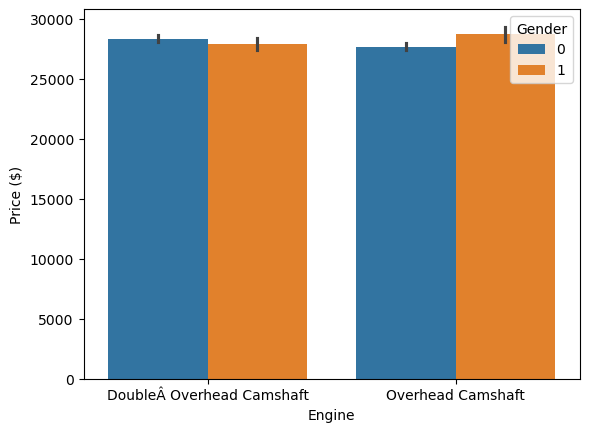

In [59]:
sns.barplot(x='Engine', y='Price ($)', hue='Gender', data=df, estimator=np.mean)

<Axes: xlabel='Body Style', ylabel='Price ($)'>

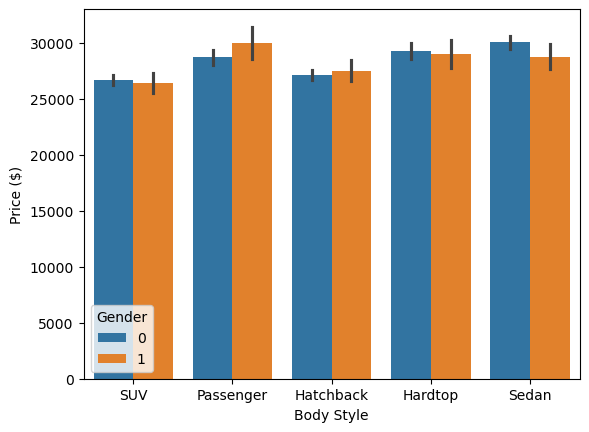

In [60]:
sns.barplot(x='Body Style', y='Price ($)', hue='Gender', data=train, estimator=np.mean)

<Axes: xlabel='Company', ylabel='Price ($)'>

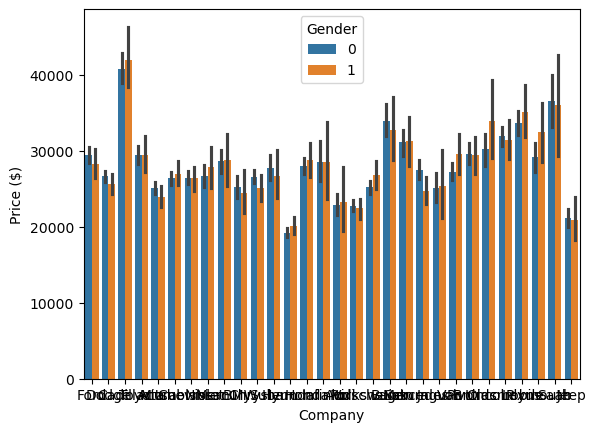

In [61]:
sns.barplot(x='Company', y='Price ($)', hue='Gender', data=train, estimator=np.mean)

#### Explaining the plots

What do each of the different bars represent in the plot? 

1) This chart shows the average price for automatic cars is higher for males compared to females. 
For manual cars, the average price is also higher for males than females.

2) This bar graph shows the average price of cars with different engine types, which is also divided by gender. 
Like in image 1, each pair of bars in this graph also represents the average price for each engine type by gender.

3) This plot shows the average price of cars with different body styles, and here too the split is done by gender. 
Each body style has a pair of bars representing the average price for each gender.

4) This plot shows a large number of companies and for each company, there is a pair of bars representing the average
price of cars from that company, distinguished by gender.

#### Interpreting the plots

What can you say about how gender interacts with other features? 

##### Write your answer here

Using the approach above to examine the interaction between gender and company can be challenging. Explain why.

##### Write your answer here


1) Considerable difference in the mean price of cars with varying transmissions when comparing the two genders which to me implies that one gender tends to buy costlier cars with a specific type of transmission compared to the other.
 
2) Similar to what I noticed in the 1st graph, here too I notice a considerable difference in the mean price of cars but with different engine types between male and females, which I believe indicates a preference or highlights trend in purchasing patterns related to engine type that varies by gender.

3) I don't see as obvious gender differences in this plot as in 1 and 2. While there is some variation in mean prices across different body styles between genders, the less pronounced variation leads me to believe that body style preferences are less varied by gender, or that price points for different body styles are more uniform across genders.

4) The relationship between gender and company results in different average prices across various companies. The plot is hard to read and interpret beacuse of to the numerous bars representing each company, making it very hard to identify clear patterns or draw conclusions about the interaction between gender and car company preference.
 

### Creating new features

When studying the interaction between gender and company, it might be helpful to create another feature that groups different companies together. Here is some code that does this.

In [70]:
train_by_company = train.groupby('Company').agg({'Price ($)': 'mean'}).sort_values(by=['Price ($)']).reset_index()
train_by_company['type'] = pd.qcut(train_by_company['Price ($)'],
                                   3,
                                   labels=['low-tier', 'mid-tier', 'high-tier'])

train = train.merge(train_by_company.drop(columns=['Price ($)']), on=['Company'])


<Axes: xlabel='type', ylabel='Price ($)'>

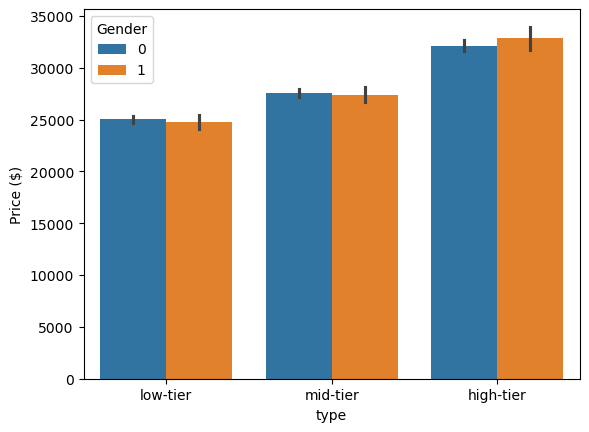

In [71]:
sns.barplot(x='type', y='Price ($)', hue='Gender', data=train)

#### Understanding the code

Explain in bullet points what this code does, and why this makes sense. 

##### Write your answer here
Based on my interpretation of this code it does the following 
- Companies are grouped by their by price tier ,which involves creating a new dataframe to calculate the mean price for each company 
- Then the companies are divided into low-tier, mid-tier, and high-tier categories. 
- The new categories are then merged back into the original dataframe
- Then a  bar plot is created to compare the mean prices across the price tiers, split by the genders. 
- This approach simplifies data analysis, enhances understanding of market segments, and presents data visually.

#### Improving the grouping
Would you change anything about how the different companies are being grouped together? Why or why not? 

I think I would try to ensure that when I'm grouping, the tiers have a balanced number of companies in each because 
if one tier ends up with too few or too many companies, it might not generate a meaningful or even worthwhile segmentation. 

### From plots to regression models

Describe the different steps you would need to take to fit a regression model with interaction effects. 
1. Converting categorical variables into a format that can be used by a regression model to create variables that demonstrate the interaction between gender and other features.
2. Defining the regression model to include both the individual independent variables and the interaction variables.
3. Interpreting the coefficients of the interaction terms to understand how the predictor and outcome variables relate at different levels of the interacting variable.
4. Validating the model using cross-validation or other validation methods.
5. Tuning and editing the model based on the predicted results involves adding or removing variables, transforming variables, and so on.